In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load the Data

In [2]:
data = pd.read_csv('Fraud.csv')

#### EDA

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data[data['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [8]:
data[data['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**Few features are unnecessary and will not contribute to the accuracy of our model namely and also seperate out the target**

- nameOrig
- nameDest
- step


Reason being some of they are either simpified timestamp or nominal variable

**So we will exclude it**

In [9]:
y = data['isFraud']
X = data[['type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFlaggedFraud']]

In [10]:
print(y.shape)
print(X.shape)


(6362620,)
(6362620, 7)


In [11]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


Now among this columns logically there should be a strong correlation bewtwwn some columns , because amount transfered should be diffrence between the old and new balance, there's a need for verification of that

In [ ]:
X['experiment1'] = X['oldbalanceOrg'] - X['newbalanceOrig']
X['experiment1'] = X['experiment1'].abs()

In [13]:
s = X['experiment1'] - X['amount']

In [14]:
s.value_counts()

 0.000000e+00    929095
-1.818989e-12     54029
 1.818989e-12     54016
 3.637979e-12     52700
-3.637979e-12     52554
                  ...  
-3.307826e+05         1
-1.579140e+04         1
-2.482956e+05         1
-1.460229e+05         1
-5.674548e+06         1
Length: 3347152, dtype: int64

The assumption seems to be wrong , so I will include the amount column for now, and drop our experiment column that I created for the experiment

In [15]:
X.drop(columns='experiment1')

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,0
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,0
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,0


Now I will deal with catagorical column `type` and check it's value counts

In [16]:
X['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

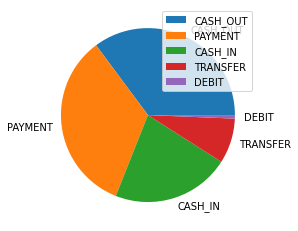

In [17]:
plt.pie(X['type'].value_counts(),labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.legend()
plt.show()

Let's also the data types once again to be sure of that there is no column containg string values like '?'

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
 7   experiment1     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 388.3+ MB


Also I will check once that there are duplicate values or not to prevent Data leakage

In [19]:
print(X.shape)
X.drop_duplicates()
print(X.shape)

(6362620, 8)
(6362620, 8)


#### Feature Engineering and Model building with pipeline

There are mainly three things to be done in feature engineering as of now
- Class imbalance fix
- Catagorical column handle
- Scaling

In [28]:
#FE imports
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#model imports
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#metrics import
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5090096, 8) (5090096,)
(1272524, 8) (1272524,)


- Flow of the pipeline would be ohe>>smote>>scaler>>model_fitment
- I will write the code in such a way that with a small change we can switch from over sampling to under sampling

In [34]:
# Logistic Regression
# I will try both with over and under sampling

ohe = OneHotEncoder()
sm = SMOTE()
ru = RandomUnderSampler()
scaler = MaxAbsScaler()
ct = ColumnTransformer([
    ('ohe',ohe,['type'])
],remainder='passthrough')

clf = SGDClassifier(loss='log_loss',max_iter=2000)



pipe_logit = Pipeline([('ct',ct),('ru',ru),('scale',scaler),('clf',clf)]) #just change switch ru to sm to to swich from us to os

pipe_logit.fit(X_train,y_train)

y_pred = pipe_logit.predict(X_test)



              precision    recall  f1-score   support

           0       1.00      0.92      0.96   1270908
           1       0.01      0.84      0.02      1616

    accuracy                           0.92   1272524
   macro avg       0.51      0.88      0.49   1272524
weighted avg       1.00      0.92      0.95   1272524



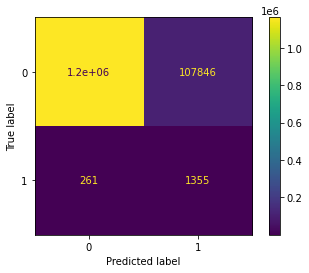

In [35]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


- Both under and over sampling producing similar result.
- Still there are about 9% cases where transaction is getting falsly marked as fraud
- And about 16% frauds are being marked as safe transaction
- **So there is a scope of improvement**

In [40]:
#Now let's try random forest

clf = RandomForestClassifier(n_estimators=200,)

pipe_rf = Pipeline([('ct',ct),('ru',ru),('scale',scaler),('clf',clf)]) 

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270908
           1       0.11      1.00      0.20      1616

    accuracy                           0.99   1272524
   macro avg       0.56      0.99      0.60   1272524
weighted avg       1.00      0.99      0.99   1272524



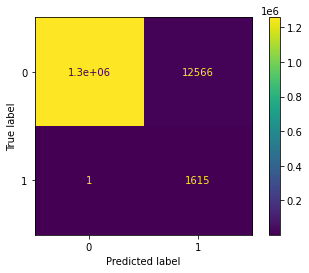

In [41]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


- This is a satisfactory performance, only 1 fraud transaction is predicted as same
- Though about 12566(0.009%) of the safe transaction are marked as fraud
- Let's see by applying another model if there are any chance of improvement in this front
- This performance is achieved using undersampling , oversampling taking a lot of time to train (40min+)

In [46]:
#let's apply xgboost
clf = XGBClassifier(booster = 'gbtree')

pipe_xgb = Pipeline([('ct',ct),('ru',ru),('scale',scaler),('clf',clf)]) 

pipe_xgb.fit(X_train,y_train)

y_pred = pipe_xgb.predict(X_test)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270908
           1       0.13      1.00      0.23      1616

    accuracy                           0.99   1272524
   macro avg       0.57      1.00      0.61   1272524
weighted avg       1.00      0.99      0.99   1272524



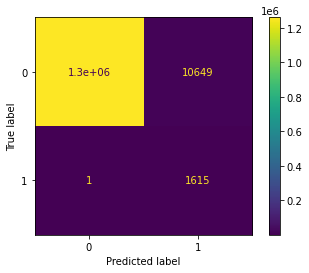

In [47]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


- Safe transaction getting marked as fraud has been reduced further.
- Similiar performance to random forest on other fronts
- Let's see if hyper parameter tuning gives us any improvement

In [50]:
#let's apply xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
kfold = KFold(shuffle=True)
pipe_xgb = Pipeline([('ct',ct),('ru',ru),('scale',scaler),('xgb',XGBClassifier(booster = 'gbtree'))]) 

paramgrid_xgb = {'xgb__max_depth': [70, 80 ],
                'xgb__n_estimators': [200, 300,400,500,600],
                'xgb__gamma': [ 0.7, 0.8,]}
grid_xg = GridSearchCV(pipe_xgb, param_grid=paramgrid_xgb, cv=kfold, scoring='f1_macro')
grid_xg.fit(X_train,y_train)

y_pred = grid_xg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270908
           1       0.15      1.00      0.27      1616

    accuracy                           0.99   1272524
   macro avg       0.58      1.00      0.63   1272524
weighted avg       1.00      0.99      1.00   1272524



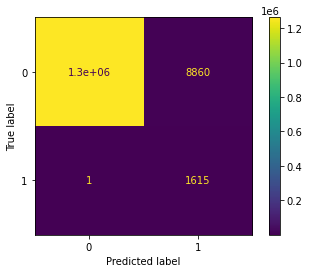

In [51]:
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [52]:
grid_xg.best_params_

{'xgb__gamma': 0.8, 'xgb__max_depth': 80, 'xgb__n_estimators': 500}

- Now results are satisfactory 
- Only one fraud transaction(FN) is getting flagged safe
- The number of safe transaction getting flagged as fraud(FP) has also reduced.
- Model building and evaluation part is complete


**As a last step I will do some descriptive analysis on the fraud transaction to gain some insights for the business**

On Fraud

In [53]:
frauds = data[data['isFraud'] == 1]

In [54]:
frauds.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [75]:
frauds['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

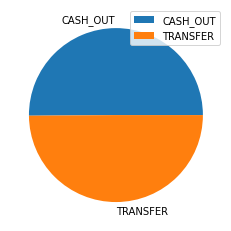

In [76]:
plt.pie(frauds['type'].value_counts(),labels=['CASH_OUT','TRANSFER'])
plt.legend()
plt.show()

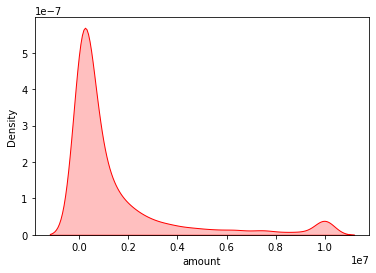

In [79]:
import seaborn as sns
res = sns.kdeplot(frauds['amount'],color='red',shade=True)
plt.show()

-------------------------------------------------------------------------------------------------

On Non Fraud

In [64]:
nonfrauds = data[data['isFraud'] != 1]

In [65]:
nonfrauds.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0


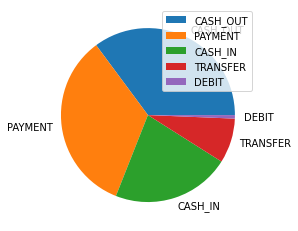

In [68]:
plt.pie(nonfrauds['type'].value_counts(),labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.legend()
plt.show()

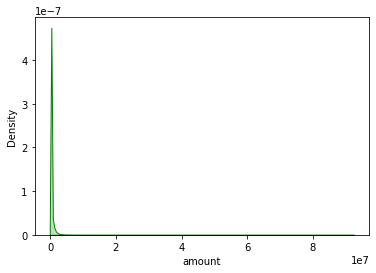

In [80]:

res = sns.kdeplot(nonfrauds['amount'],color='green',shade=True)
plt.show()

**Insights gained**

- Fraudulent transactions are eithe cash or debit
- Amounts being transfered as a higher mean value
- Accounts that are being targeted has 10times higher mean value in case of frauds
